# Part II - An analysis of features which have the most influence of Loan Outcomes.
## by Oludare Adekunle

## Investigation Overview


> The aim of this project is to investigate how various factors influence loan outcomes listed in the loan status column. This could aid determine what factors must be considered before issuing a loan as they will increase the loan completion performance.


## Dataset Overview

> Loan Data from Prosper: This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. Of these I selected a subset of 23 features and Loan status column. Of the subset a smaller subset of loan status, employment status, listing category, borrower rates and howeowners are used as they show lage variations across the factors being observed, Loan status. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df= pd.read_csv('prosperLoanData.csv')

loan_df= df[['ListingCreationDate', 'Term', 'LoanStatus', 'BorrowerAPR', 
          'BorrowerRate', 'ListingCategory (numeric)', 'BorrowerState', 
          'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration', 
          'IsBorrowerHomeowner', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 
          'RevolvingCreditBalance', 'BankcardUtilization', 'AvailableBankcardCredit', 
          'DebtToIncomeRatio', 'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome', 
          'MonthlyLoanPayment', 'Recommendations', 'Investors', 'LoanOriginalAmount']]

a= ['Listing_Creation_Date', 'Term', 'Loan_Status', 'Borrower_APR',
       'Borrower_Rate', 'Listing_Category', 'Borrower_State',
       'Occupation', 'Employment_Status', 'Employment_Status_Duration',
       'Is_Borrower_Home_owner', 'Credit_Score_Range_Lower', 'Credit_Score_Range_Upper',
       'Revolving_Credit_Balance', 'Bank_card_Utilization',
       'Available_Bank_card_Credit', 'Debt_To_Income_Ratio', 'Income_Range',
       'Income_Verifiable', 'Stated_Monthly_Income', 'Monthly_Loan_Payment', 
    'Recommendations', 'Investors', 'Loan_Original_Amount']
    
b= [x.lower() for x in a]

loan_df.columns= b

def redefine_past(x):
    """
    This function checks if the first four letters in a string are 'Past' and replaces that with 'Past due'
    """
    if x.startswith('Past'):
        return 'Past Due'
    else:
        return x
    

loan_df_ol= loan_df.copy()
loan_df_ol['loan_status']= loan_df_ol['loan_status'].apply(redefine_past)

listing_dict= {0:'Not Available', 1:'Debt Consolidation', 2:'Home Improvement', 3:'Business', 
                4:'Personal Loan', 5:'Student Use', 6:'Auto', 7:'Other', 8:'Baby&Adoption', 
                9:'Boat', 10:'Cosmetic Procedure', 11:'Engagement Ring', 12:'Green Loans', 
                13:'Household Expenses', 14:'Large Purchases', 15:'Medical/Dental', 
                16:'Motorcycle', 17:'RV', 18:'Taxes', 19:'Vacation', 20:'Wedding Loans'}

def rep_listings(x):
    return listing_dict[x]

loan_df_ol['listing_category']= loan_df_ol['listing_category'].apply(rep_listings)

# creating a categorical data of the loan status column
loan_status_classes= ['Completed', 'FinalPaymentInProgress', 'Current', 'Past Due', 'Defaulted', 'Chargedoff', 'Cancelled']
l_classes= pd.api.types.CategoricalDtype(ordered=True, categories=loan_status_classes)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution across all states of the loan status.

> The chart below shows the distribution of various loan states of observations in the dataset.

> From the plot chart above we can see that the out if the current observations in the data, 50% are currently under a type of loan, 33% completed the loan, while 17% belond to some state of defaulted, charged off or past due.

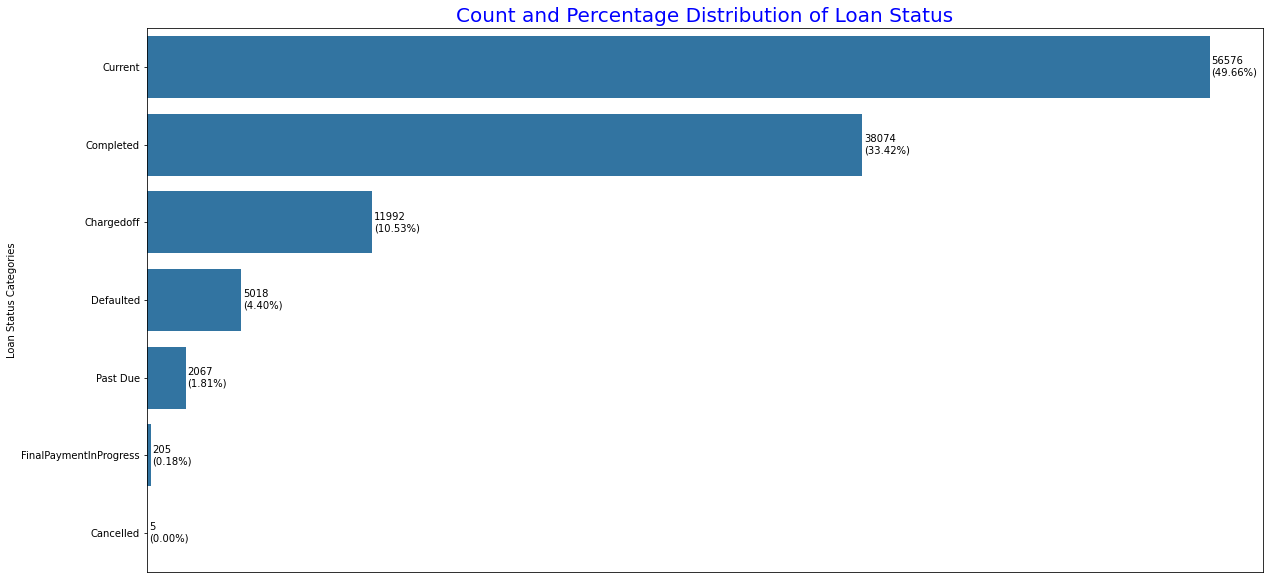

In [3]:
def plot_univa(df, col, col_title, x, y):
    """
    This function creates a count plot with the count and percentage of each bar shown infront of the plot
    """
    type_count= df[col].value_counts()
    type_order= type_count.index
    type_sum= sum(type_count.values)

    plt.figure(figsize=[x, y])
    sb.countplot(data=df, y=col, color=sb.color_palette()[0], order=df[col].value_counts().index)
    plt.title(f'Count and Percentage Distribution of {col_title}', color='blue', fontsize=20)
    plt.ylabel(f'{col_title} Categories')
    plt.xlabel(None)
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

    for i in range(type_count.shape[0]):
        count= type_count[i]
        pct_string= '{}\n({:0.2f}%)'.format(count, count/type_sum*100)
        plt.text(count+100, i, pct_string, va= 'center')

plot_univa(loan_df_ol, 'loan_status', 'Loan Status', 20, 10)

## Distribution of borrower rate across loan status.

> The plot below shows the median borrower rate while the width of each violin shows consentration of borrowers around the borrower rate.

> From the plot we can see that most borrowers in the completed category are concentrated around the lower borrower rates (less than the median rate), while borrowers who defaulted have a higher median borrower rate and are concentrated around the higher borrower rates

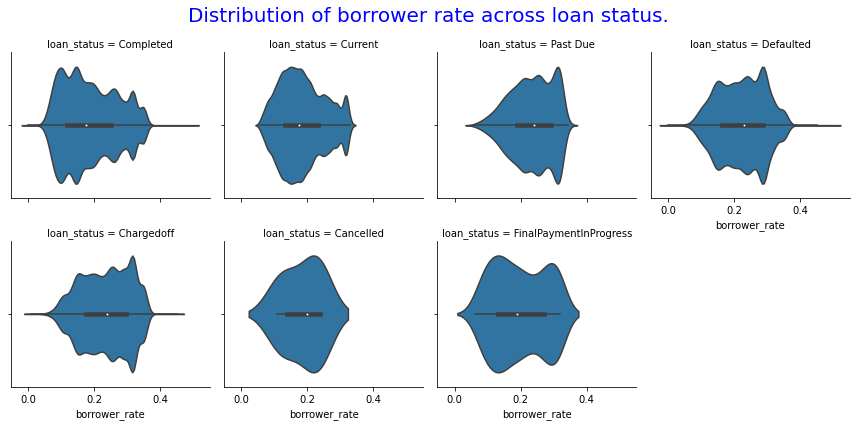

In [4]:
# plot facetgrid
g= sb.FacetGrid(data=loan_df_ol, col='loan_status', col_wrap=4)
g.fig.suptitle('Distribution of borrower rate across loan status.', color='b', fontsize=20)
g.map(sb.violinplot, 'borrower_rate');

## Distribution of Employment Status across loan Status.

> This plot shows the various states of employment and how they perform on loans borrowed. Below are the findings from this exploration.

> The employed status has the most observations. Furthermore, when we look at the diffent states of employed recorded, we see that part-time have the best loan completion self-employed and full-time.

> Borrowers who state other as their employment status have the most probability of not paying back their loans.

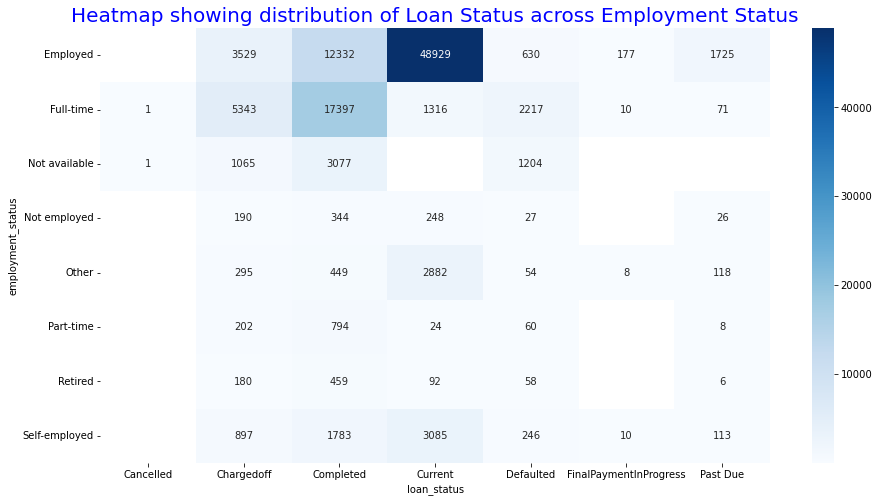

In [5]:
df_loan_em= loan_df_ol.groupby(['loan_status', 'employment_status']).size()
df_loan_em= df_loan_em.reset_index(name='count')
df_loan_em= df_loan_em.pivot(columns='loan_status', index='employment_status', values='count')

plt.figure(figsize=(15, 8))
sb.heatmap(df_loan_em, cmap='Blues', annot=True, fmt='g')
plt.title('Heatmap showing distribution of Loan Status across Employment Status', color='b', fontsize=20);

## Distribution of Loan listings across loan Status.

> This plot shows how the various reasons for which loans are borrowed and how the turn out across those reasons. Below are the insights from exploring the data

> In almost all loan status category, we see that the reason for which our observation access loans the most is for debt consolidation. However, when we look at the defaulted category where we expect to find similar trend of debt consolidation topping the list we find that, observations where there is no record of what the loan is used for tops the chart.

> Observations for which we have no record of what they were used for, also takes the lead in the loans that have been charged off.

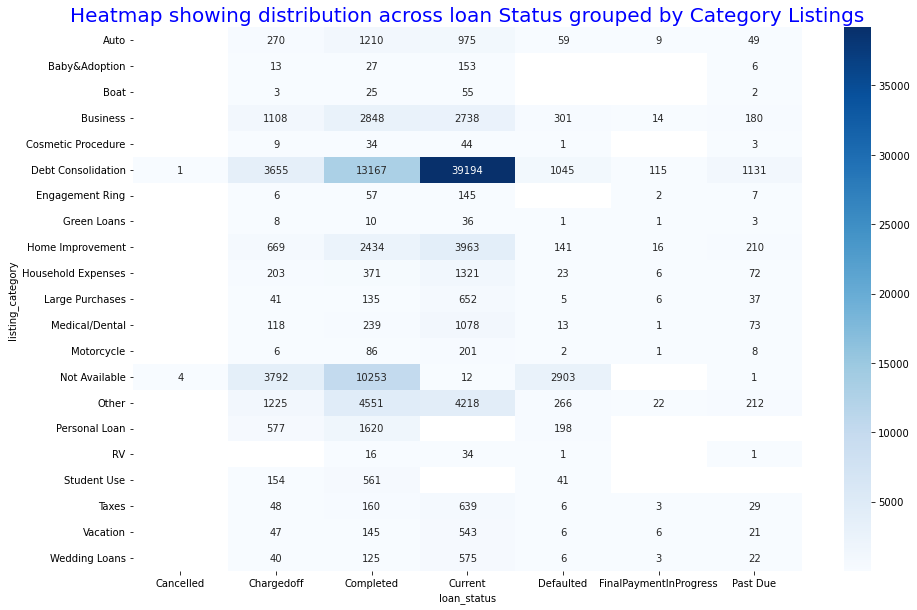

In [6]:
# creating a df that can be used to create a heatmap
df_status_listing= loan_df_ol.groupby(['loan_status', 'listing_category']).size()
df_status_listing= df_status_listing.reset_index(name='count')
df_status_listing= df_status_listing.pivot(columns='loan_status', index='listing_category', values='count')

plt.figure(figsize=(15, 10))
sb.heatmap(df_status_listing, cmap='Blues', annot=True, fmt='g')
plt.title('Heatmap showing distribution across loan Status grouped by Category Listings', color='b', fontsize=20);

## Borrower rates on loan status for home owners against non home owners

> Generally, there is a less borrower rate for home-owners.

> Distribution of our observation across the different status is thesame for both home-owner and non-home-owner except in the defaulted status where concentration of observations of home-owners that defaulted have high borrower rate, while reverese is the case for non-home-owners.

> Regardess of home-owner status, low borrower rate tends plays a role in enabling completion of loan status.

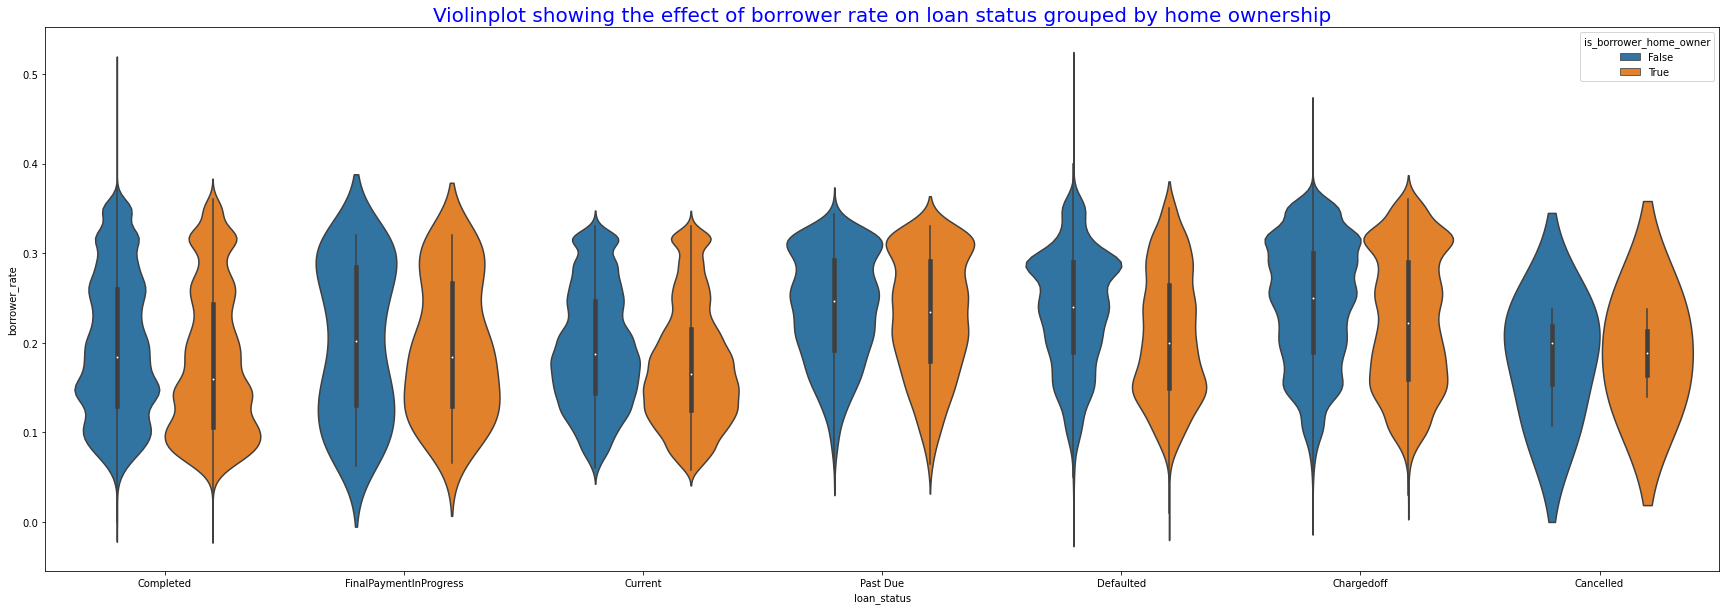

In [7]:
plt.figure(figsize=(30,10))
sb.violinplot(data=loan_df_ol, x='loan_status', y='borrower_rate', hue='is_borrower_home_owner', order=loan_status_classes)
plt.title('Violinplot showing the effect of borrower rate on loan status grouped by home ownership', color='b', fontsize=20);

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [8]:
!jupyter nbconvert an_analysis_of_features_which_have_the_most_influence_of_loan_outcomes_II.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook an_analysis_of_features_which_have_the_most_influence_of_loan_outcomes_II.ipynb to slides
[NbConvertApp] Writing 1089026 bytes to an_analysis_of_features_which_have_the_most_influence_of_loan_outcomes_II.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\ProgramData\Anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbconver

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 